In [8]:
# set wd
import os
os.chdir('C:/Users/User/Desktop/SCUOLA/UNI/2.Magistrale/TESI/Causal_Inference_for_Multivariate_Time_Series/Code/Python code/real world data/Hybrid file')

In [9]:
# put Butter, Cheese and Milk datasets' Values column together in a dataframe with the date column
import pandas as pd
import numpy as np
import matplotlib

# load the datasets
Butter = pd.read_csv('data/dairy_markets/Butter.csv')
Cheese = pd.read_csv('data/dairy_markets/Cheese.csv')
Milk = pd.read_csv('data/dairy_markets/Milk.csv')

# put the values column together
data = pd.DataFrame({'Date': Butter['Date'], 'Butter': Butter['Values'], 'Cheese': Cheese['Values'], 'Milk': Milk['Values']})

# save the data
data.to_csv('dairy_markets_merged.csv', index = False)


In [22]:
# Load, clean & save
from Custom_dataset_loader_2 import dataframe_storer

processor = dataframe_storer('data/dairy_markets/dairy_markets_merged.csv', 'dairy_dataframes.pkl', folder=False)
dfs = processor.load_data()
processor.clean_data(column_to_remove=0, column_name=None)
processor.save_data()

Datasets loaded into the dictionary:
dairy_markets_merged
Data cleaned.
Data saved to dairy_dataframes.pkl.


In [23]:
# Analyse
processor.analyze_dataset('dairy_markets_merged')

Analyzing dataset: dairy_markets_merged
DataFrame head:
     Butter    Cheese      Milk
0  1.470000  1.767500  1.153611
1  1.429166  1.820250  1.165000
2  1.311250  1.862763  1.165625
3  1.231250  1.896973  1.161250
4  1.015000  1.505833  1.070000


In [24]:
# Make nodes
from Custom_dataset_loader_2 import NodesNAmeMaker

column_mapper = NodesNAmeMaker(dfs)

# preprocessed_1
output_text = column_mapper.map_columns('dairy_markets_merged')
if output_text:
    print(output_text)
    # Save the output to a text file
    column_mapper.save_output(output_text, 'nodes_dairy.txt')

A: Butter
B: Cheese
C: Milk
Output saved to nodes_dairy.txt


Nodes: ['A', 'C', 'B']
Adjacency Matrix:
 [[0 0 0]
 [0 0 0]
 [1 1 0]]


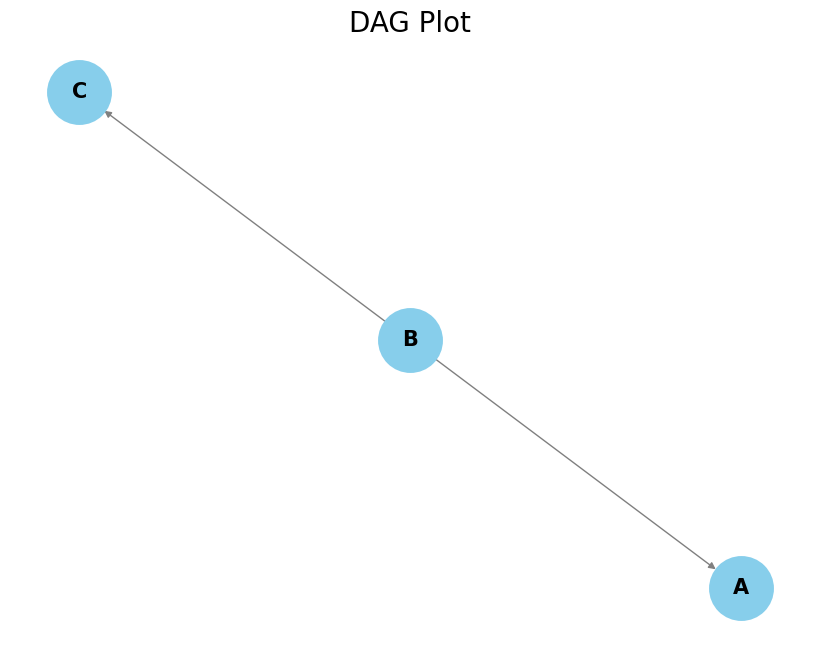

In [25]:
# Make DAG
from Custom_dataset_loader_2 import DAG_maker

processor = DAG_maker()

'''
Cheese -> Butter
Cheese -> Milk

A: Butter
B: Cheese
C: Milk
'''

# preprocessed_1
nodes, adj_matrix = processor.dag_to_adj_matrix('B->A, B->C')
print("Nodes:", nodes)
print("Adjacency Matrix:\n", adj_matrix)
processor.adj_matrix_to_graph(nodes, adj_matrix)
processor.plot_graph()